In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [5]:
df= pd.read_csv("/content/warn_info.csv")

In [6]:
df1= df.copy()

In [7]:
df1

,static_text,log_level,preprocessed_text
0,No serialized RegionInfo in,warn,serial regioninfo
1,Added * regions to meta.,info,ad region meta
2,Updated * in hbase:meta,info,updat hbase meta
3,Deleted table | state from META,info,delet tabl state meta
4,Updated row * with server=,info,updat row
...,...,...,...
7653,caught an interrupted exception when waiting w...,warn,caught interrupt except wait close ticker thread
7654,not executing watch [*] on this scheduler beca...,info,execut watch schedul paus
7655,SpnegoClient with userPrincipalName : *,info,spnegocli userprincipalnam
7656,SimpleKdcLdapServer started.,info,simplekdcldapserv start


In [8]:
df1['log_level'].value_counts()

info    3903
warn    3755
Name: log_level, dtype: int64

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df1['preprocessed_text'].fillna('', inplace=True)
df1 = df1.dropna(subset=['preprocessed_text'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df1['preprocessed_text'])

In [13]:
# Label encoding
df1['log_level'] = df1['log_level'].map({'info': 0, 'warn': 1})
y = df['log_level']

In [14]:
df1

,static_text,log_level,preprocessed_text
0,No serialized RegionInfo in,1,serial regioninfo
1,Added * regions to meta.,0,ad region meta
2,Updated * in hbase:meta,0,updat hbase meta
3,Deleted table | state from META,0,delet tabl state meta
4,Updated row * with server=,0,updat row
...,...,...,...
7653,caught an interrupted exception when waiting w...,1,caught interrupt except wait close ticker thread
7654,not executing watch [*] on this scheduler beca...,0,execut watch schedul paus
7655,SpnegoClient with userPrincipalName : *,0,spnegocli userprincipalnam
7656,SimpleKdcLdapServer started.,0,simplekdcldapserv start


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [19]:

y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [22]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.825065274151436
              precision    recall  f1-score   support

        info       0.84      0.82      0.83       800
        warn       0.81      0.83      0.82       732

    accuracy                           0.83      1532
   macro avg       0.82      0.83      0.82      1532
weighted avg       0.83      0.83      0.83      1532



done
done
['info' 'info' 'warn' 'info' 'info' 'info' 'info' 'info' 'info']
Accuracy: 0.33
Precision: 0.38
Recall: 0.75
F1 Score: 0.50
Confusion Matrix:
[[0 5]
 [1 3]]


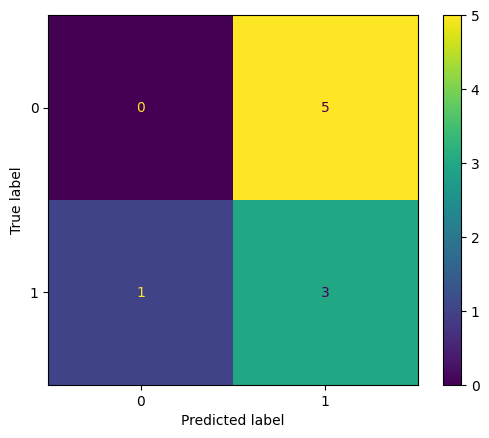

In [24]:
#This need tobe edited for we and  wi


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Unused variable 'unused_variable", "This function is deprecated, use new_function instead","Near memory limit", "Program crashed when loading file", "Division by zero is undefined", "Unused import 'unused_function'", "File Transfer Complete", "File loaded", "missing parentheses in call to 'example_function'"]
#The codding for the log messages is: {INFO: 0, Warn:1}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()

In [25]:
from sklearn.svm import SVC

In [26]:
model1=SVC()
model1.fit(X_train, y_train)

SVC()

In [27]:
y_pred = model1.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [30]:
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8296344647519582
              precision    recall  f1-score   support

        info       0.83      0.85      0.84       800
        warn       0.83      0.81      0.82       732

    accuracy                           0.83      1532
   macro avg       0.83      0.83      0.83      1532
weighted avg       0.83      0.83      0.83      1532



done
done
['info' 'warn' 'warn' 'info' 'info' 'info' 'info' 'info' 'info']
Accuracy: 0.44
Precision: 0.43
Recall: 0.75
F1 Score: 0.55
Confusion Matrix:
[[1 4]
 [1 3]]


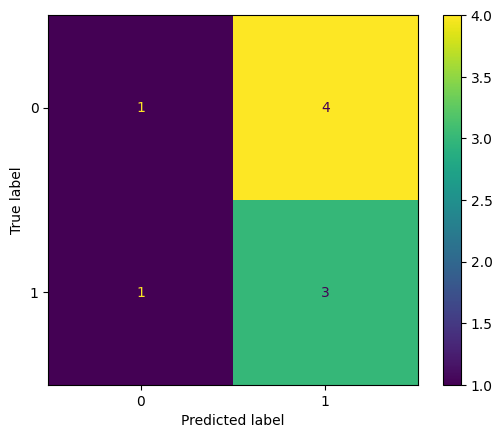

In [31]:
#This need tobe edited for we and  wi


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Referred to https://learn.microsoft.com/en-us/previous-versions/windows/desktop/bb226812(v=vs.85) to construct representative log messages.
messages = ["Unused variable 'unused_variable", "This function is deprecated, use new_function instead","Near memory limit", "Program crashed when loading file", "Division by zero is undefined", "Unused import 'unused_function'", "File Transfer Complete", "File loaded", "missing parentheses in call to 'example_function'"]
#The codding for the log messages is: {INFO: 1, ERROR:0}.
true_labels = [0,0,1,1,0,0,1,1,0]

#Feature extraction using TF-IDF
message_Vect = tfidf_vectorizer.transform(messages)
print('done')
predicted_labels = model1.predict(message_Vect)
predicted_lables_bin = []
for i in predicted_labels:
    if i=='info':
        predicted_lables_bin.append(1)
    else:
        predicted_lables_bin.append(0)

print('done')
#Calculates accuracy
accuracy = accuracy_score(true_labels,predicted_lables_bin)
print(predicted_labels)
#Calculate precision, recall, and F1 score
precision = precision_score(true_labels,predicted_lables_bin)
recall = recall_score(true_labels, predicted_lables_bin)
f1 = f1_score(true_labels, predicted_lables_bin)

#Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_lables_bin)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_lables_bin)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()

plt.show()